# **Ejercicio: Implementación desde cero de una Regresión Lineal**

**Objetivo:**

El propósito de este ejercicio es que el estudiante implemente una regresión lineal utilizando el método de mínimos cuadrados sin recurrir a librerías de machine learning (como `scikit-learn`, `statsmodels`, etc.). El desarrollo debe hacerse paso a paso, utilizando únicamente Python básico y librerías numéricas como `numpy`, `pandas` y un par de funciones seccionadas de `scipy.stats.t`.

La meta es comprender de manera profunda el modelo lineal y las métricas asociadas.

# Datos
Tenemos un pequeño conjunto de datos para trabajar con datos:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#dataset
df = pd.DataFrame({'x': [8, 12, 12, 13, 14, 16, 17, 22, 24, 26, 29, 30],
                   'y': [41, 42, 39, 38, 40, 39, 45, 46, 42, 49, 55, 57]})

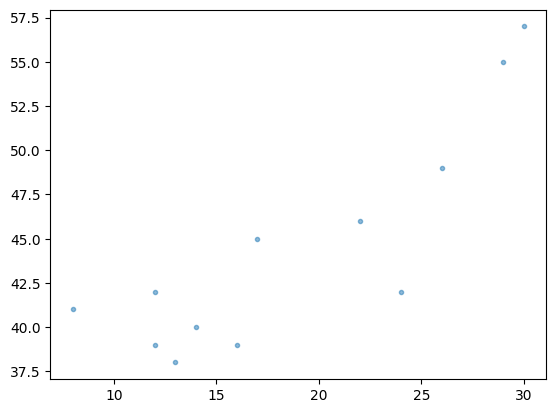

In [2]:
plt.scatter(df['x'], df['y'], marker=".", alpha=0.5)

A continuacion definimos las variables dependientes e independientes:

In [3]:
# definimos la variable dependiente
Y = df['y']

# definimos la variable independiente
X = df['x']

# Modelo lineal
A continuacion definimos las funciones de nuestro modelo y la funcion para obtener nuestras predicciones.

In [19]:
def MODELO(X, Y):
  """ Desarrolla el modelo de regresion lineal utilizando el metodo de tu preferencia,
      Regresa los coeficientes del modelo: intercepto (bias) y pendiente.
  """
  n = len(X)
  mean_x = np.mean(X)
  mean_y = np.mean(Y)

  sum_of_products_of_deviations = np.sum((X - mean_x) * (Y - mean_y))

  sum_of_squares_of_deviations_x = np.sum((X - mean_x)**2)

  beta_1 = sum_of_products_of_deviations / sum_of_squares_of_deviations_x

  beta_0 = mean_y - beta_1 * mean_x

  return beta_0, beta_1

def Predict (beta_0, beta_1, X):
  """ Regresa los valores predichos."""
  return beta_0 + beta_1 * X

# Metricas Estadisticas
En esta seccion, se implementaran los diversa metricas estadisticas que describen la calidad de ajuste de nuestro modelo y los detalles de los coeficientes y datos.

In [5]:
def R2_score(y_true, y_pred):
  """ Calcula y regresa el valor del coeficiente de determinacion """
  ss_total = np.sum((y_true - np.mean(y_true))**2)
  ss_residual = np.sum((y_true - y_pred)**2)
  r2 = 1 - (ss_residual / ss_total)
  return r2

In [17]:
def std_error(x, y_true, y_pred):
  """ Calcula y regresa el valor del error estandar de los estimadores b_0 y b_1 [tupla o lista] """
  # HINT:
  n = len(x)
  sse = np.sum((y_true - y_pred)**2)
  rse = np.sqrt(sse / (n - 2))

  sum_of_squares_of_deviations_x = np.sum((x - np.mean(x))**2)
  std_err_beta_1 = rse / np.sqrt(sum_of_squares_of_deviations_x)

  std_err_beta_0 = rse * np.sqrt(1/n + np.mean(x)**2 / sum_of_squares_of_deviations_x)

  return (std_err_beta_0, std_err_beta_1)

In [16]:
def IC(beta_0, beta_1, x, y_true, y_pred, alpha):
  """ Calcula y regresa los intervalos de confianza (inferior, superior) de los estimadores b_0 y b_1 [tupla o lista] """
  # HINT: puedes utilizar 'stats.t.ppf' para el calculo de valor critico
  n = len(x)
  degrees_of_freedom = n - 2
  t_critical = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

  std_err_beta_0, std_err_beta_1 = std_error(x, y_true, y_pred)

  ci_beta_0_lower = beta_0 - t_critical * std_err_beta_0
  ci_beta_0_upper = beta_0 + t_critical * std_err_beta_0
  ci_beta_1_lower = beta_1 - t_critical * std_err_beta_1
  ci_beta_1_upper = beta_1 + t_critical * std_err_beta_1

  return [(ci_beta_0_lower, ci_beta_0_upper), (ci_beta_1_lower, ci_beta_1_upper)]

In [8]:
def T(beta_0, beta_1, x, y_true, y_pred):
  """ Calcula y regresa la estadistica de prueba T para los estimadores b_0 y b_1 [tupla o lista] """
  std_err_beta_0, std_err_beta_1 = std_error(x, y_true, y_pred)
  t_beta_0 = beta_0 / std_err_beta_0
  t_beta_1 = beta_1 / std_err_beta_1
  return (t_beta_0, t_beta_1)

def Pvalue(t_value, df, two_tails=True):
  """ Calcula y regresa el p-value dependiendo si se trata de una prueba de una o dos colas [float] """
  # HINT: puedes utilizar 'stats.t.sf' para el calculo
  if two_tails:
    p_value = stats.t.sf(np.abs(t_value), df) * 2
  else:
    p_value = stats.t.sf(t_value, df)
  return p_value

# Comparativa

A continuacion mostramos los resultados obtenidos de un modelos de la libreria de `statsmodels`. Compare los resultados que obtuvo con los resultados obtenidos por el modelo.

In [9]:
import statsmodels.api as sm

# Definicion & fit de un modelo de regresion lineal
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()

# Imprimir el reporte estadistico
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     27.73
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           0.000365
Time:                        20:20:22   Log-Likelihood:                -30.629
No. Observations:                  12   AIC:                             65.26
Df Residuals:                      10   BIC:                             66.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7636      2.772     11.096      0.0

# Otros datos

A continuacion mostramos un conjunto de datos alternativo. Aplica nuevamente el modelo a estos nuevos datos, junto con sus metricas estadisticas.

* **¿Ha percibido algun valor anormal en los coeficientes, intervalos de confianza o P-values? De ser asi, ¿A que se lo adjudica?**

In [10]:
df = pd.DataFrame({'x': [-10.583333333333332,-6.583333333333332, -6.583333333333332, -5.583333333333332, -4.583333333333332, -2.583333333333332, -1.5833333333333321, 3.416666666666668, 5.416666666666668, 7.416666666666668, 10.416666666666668, 11.416666666666668],
                   'y': [-3.4166666666666643, -2.4166666666666643, -5.416666666666664, -6.416666666666664, -4.416666666666664, -5.416666666666664, 0.5833333333333357, 1.5833333333333357, -2.4166666666666643, 4.583333333333336, 10.583333333333336, 12.583333333333336]})

In [11]:
# definimos la variable dependiente
Y = df['y']

# definimos la variable independiente
X = df['x']

In [14]:
beta_0_new, beta_1_new = MODELO(X, Y)
y_pred_new = Predict(beta_0_new, beta_1_new, X)

In [15]:
r2_new = R2_score(Y, y_pred_new)
std_err_new = std_error(X, Y, y_pred_new)
ic_new = IC(beta_0_new, beta_1_new, X, Y, y_pred_new, alpha=0.05)
t_new = T(beta_0_new, beta_1_new, X, Y, y_pred_new)
p_value_beta_0_new = Pvalue(t_new[0], len(X) - 2)
p_value_beta_1_new = Pvalue(t_new[1], len(X) - 2)

print("Modelo aplicado a los nuevos datos:")
print(f"Intercepto (beta_0): {beta_0_new}")
print(f"Pendiente (beta_1): {beta_1_new}")
print(f"R2 Score: {r2_new}")
print(f"Error Estándar (beta_0, beta_1): {std_err_new}")
print(f"Intervalos de Confianza (beta_0, beta_1): {ic_new}")
print(f"Estadística T (beta_0, beta_1): {t_new}")
print(f"P-value (beta_0): {p_value_beta_0_new}")
print(f"P-value (beta_1): {p_value_beta_1_new}")

Modelo aplicado a los nuevos datos:
Intercepto (beta_0): 1.4984200709999033e-15
Pendiente (beta_1): 0.7346967362375681
R2 Score: 0.7349769943860474
Error Estándar (beta_0, beta_1): (np.float64(0.9823143090122661), np.float64(0.13951246923402266))
Intervalos de Confianza (beta_0, beta_1): [(np.float64(-2.188732676751321), np.float64(2.1887326767513238)), (np.float64(0.4238435832036791), np.float64(1.0455498892714572))]
Estadística T (beta_0, beta_1): (np.float64(1.5253977848562446e-15), np.float64(5.26617255268534))
P-value (beta_0): 0.9999999999999989
P-value (beta_1): 0.00036481025320703224
